# Keras Classification

In [1]:
#输出多个output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
#Open hinterland
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use("ggplot")

## Data

In [4]:
df = pd.read_csv("../DATA/cancer_classification.csv")

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df["benign_0__mal_1"].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Data Visualization

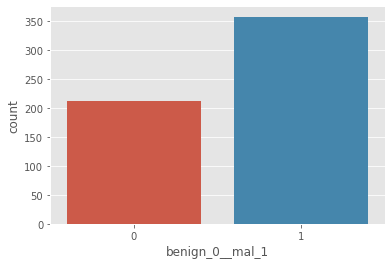

In [9]:
sns.countplot(x='benign_0__mal_1',data=df);

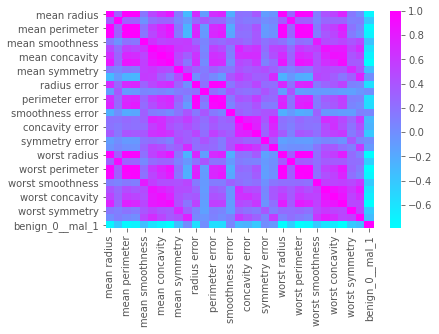

In [14]:
sns.heatmap(df.corr(), cmap="cool");

<AxesSubplot:>

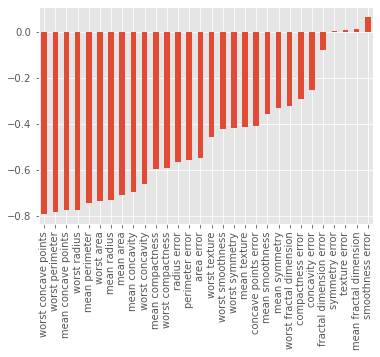

In [19]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

## Data Preprocessing

### Spliting Dataset

In [20]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((426, 30), (426,))

((143, 30), (143,))

### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [46]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

## Training Model

In [32]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6790 - accuracy: 0.6315 - val_loss: 0.6643 - val_accuracy: 0.6154
Epoch 2/600
426/426 [==============================] - 0s 241us/sample - loss: 0.6462 - accuracy: 0.6315 - val_loss: 0.6331 - val_accuracy: 0.6154
Epoch 3/600
426/426 [==============================] - 0s 189us/sample - loss: 0.6123 - accuracy: 0.6526 - val_loss: 0.5974 - val_accuracy: 0.6503
Epoch 4/600
426/426 [==============================] - 0s 172us/sample - loss: 0.5710 - accuracy: 0.7418 - val_loss: 0.5522 - val_accuracy: 0.8112
Epoch 5/600
426/426 [==============================] - 0s 179us/sample - loss: 0.5270 - accuracy: 0.8122 - val_loss: 0.5024 - val_accuracy: 0.8252
Epoch 6/600
426/426 [==============================] - 0s 169us/sample - loss: 0.4789 - accuracy: 0.8498 - val_loss: 0.4523 - val_accuracy: 0.8671
Epoch 7/600
426/426 [==============================] - 0s 171us/sample - l

426/426 [==============================] - 0s 181us/sample - loss: 0.0415 - accuracy: 0.9883 - val_loss: 0.1047 - val_accuracy: 0.9790
Epoch 112/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0423 - accuracy: 0.9836 - val_loss: 0.1082 - val_accuracy: 0.9790
Epoch 113/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0414 - accuracy: 0.9883 - val_loss: 0.1103 - val_accuracy: 0.9790
Epoch 114/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0510 - accuracy: 0.9812 - val_loss: 0.1098 - val_accuracy: 0.9790
Epoch 115/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0434 - accuracy: 0.9836 - val_loss: 0.1073 - val_accuracy: 0.9790
Epoch 116/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0460 - accuracy: 0.9836 - val_loss: 0.1069 - val_accuracy: 0.9790
Epoch 117/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0418 - accuracy: 0.9859 - val_loss: 0

426/426 [==============================] - 0s 174us/sample - loss: 0.0341 - accuracy: 0.9883 - val_loss: 0.1126 - val_accuracy: 0.9790
Epoch 167/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0330 - accuracy: 0.9883 - val_loss: 0.1135 - val_accuracy: 0.9790
Epoch 168/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0325 - accuracy: 0.9883 - val_loss: 0.1101 - val_accuracy: 0.9790
Epoch 169/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0324 - accuracy: 0.9883 - val_loss: 0.1110 - val_accuracy: 0.9790
Epoch 170/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0318 - accuracy: 0.9883 - val_loss: 0.1131 - val_accuracy: 0.9790
Epoch 171/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0329 - accuracy: 0.9883 - val_loss: 0.1227 - val_accuracy: 0.9720
Epoch 172/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0316 - accuracy: 0.9859 - val_loss: 0

426/426 [==============================] - 0s 164us/sample - loss: 0.0327 - accuracy: 0.9859 - val_loss: 0.1116 - val_accuracy: 0.9860
Epoch 222/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0299 - accuracy: 0.9859 - val_loss: 0.1192 - val_accuracy: 0.9790
Epoch 223/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0276 - accuracy: 0.9930 - val_loss: 0.1236 - val_accuracy: 0.9720
Epoch 224/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0302 - accuracy: 0.9883 - val_loss: 0.1157 - val_accuracy: 0.9790
Epoch 225/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0408 - accuracy: 0.9765 - val_loss: 0.1372 - val_accuracy: 0.9720
Epoch 226/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0323 - accuracy: 0.9836 - val_loss: 0.1131 - val_accuracy: 0.9790
Epoch 227/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0274 - accuracy: 0.9906 - val_loss: 0

426/426 [==============================] - 0s 166us/sample - loss: 0.0218 - accuracy: 0.9883 - val_loss: 0.1232 - val_accuracy: 0.9720
Epoch 277/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.1235 - val_accuracy: 0.9720
Epoch 278/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0212 - accuracy: 0.9906 - val_loss: 0.1242 - val_accuracy: 0.9720
Epoch 279/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.1280 - val_accuracy: 0.9720
Epoch 280/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0251 - accuracy: 0.9930 - val_loss: 0.1229 - val_accuracy: 0.9720
Epoch 281/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0227 - accuracy: 0.9906 - val_loss: 0.1250 - val_accuracy: 0.9720
Epoch 282/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0

426/426 [==============================] - 0s 163us/sample - loss: 0.0315 - accuracy: 0.9859 - val_loss: 0.1188 - val_accuracy: 0.9860
Epoch 332/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.1181 - val_accuracy: 0.9860
Epoch 333/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0188 - accuracy: 0.9930 - val_loss: 0.1296 - val_accuracy: 0.9720
Epoch 334/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0177 - accuracy: 0.9930 - val_loss: 0.1243 - val_accuracy: 0.9720
Epoch 335/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0174 - accuracy: 0.9930 - val_loss: 0.1410 - val_accuracy: 0.9650
Epoch 336/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0188 - accuracy: 0.9930 - val_loss: 0.1325 - val_accuracy: 0.9650
Epoch 337/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0244 - accuracy: 0.9906 - val_loss: 0

426/426 [==============================] - 0s 176us/sample - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.1482 - val_accuracy: 0.9650
Epoch 387/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.1439 - val_accuracy: 0.9650
Epoch 388/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.1464 - val_accuracy: 0.9650
Epoch 389/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.1495 - val_accuracy: 0.9650
Epoch 390/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.1436 - val_accuracy: 0.9650
Epoch 391/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0149 - accuracy: 0.9977 - val_loss: 0.1476 - val_accuracy: 0.9650
Epoch 392/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0

426/426 [==============================] - 0s 184us/sample - loss: 0.0122 - accuracy: 0.9977 - val_loss: 0.1603 - val_accuracy: 0.9580
Epoch 442/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0125 - accuracy: 0.9977 - val_loss: 0.1511 - val_accuracy: 0.9580
Epoch 443/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.1631 - val_accuracy: 0.9580
Epoch 444/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0120 - accuracy: 0.9977 - val_loss: 0.1596 - val_accuracy: 0.9580
Epoch 445/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0117 - accuracy: 0.9953 - val_loss: 0.1605 - val_accuracy: 0.9580
Epoch 446/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0115 - accuracy: 0.9977 - val_loss: 0.1591 - val_accuracy: 0.9580
Epoch 447/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0145 - accuracy: 0.9930 - val_loss: 0

426/426 [==============================] - 0s 165us/sample - loss: 0.0121 - accuracy: 0.9977 - val_loss: 0.1869 - val_accuracy: 0.9580
Epoch 497/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.1962 - val_accuracy: 0.9580
Epoch 498/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.1962 - val_accuracy: 0.9580
Epoch 499/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0116 - accuracy: 0.9953 - val_loss: 0.2001 - val_accuracy: 0.9580
Epoch 500/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0110 - accuracy: 0.9977 - val_loss: 0.1913 - val_accuracy: 0.9580
Epoch 501/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0130 - accuracy: 0.9953 - val_loss: 0.2146 - val_accuracy: 0.9441
Epoch 502/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0122 - accuracy: 0.9977 - val_loss: 0

426/426 [==============================] - 0s 287us/sample - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.2444 - val_accuracy: 0.9510
Epoch 552/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.2452 - val_accuracy: 0.9510
Epoch 553/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.2416 - val_accuracy: 0.9580
Epoch 554/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2512 - val_accuracy: 0.9510
Epoch 555/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.2396 - val_accuracy: 0.9580
Epoch 556/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.2664 - val_accuracy: 0.9441
Epoch 557/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0

In [35]:
losses = pd.DataFrame(model.history.history)

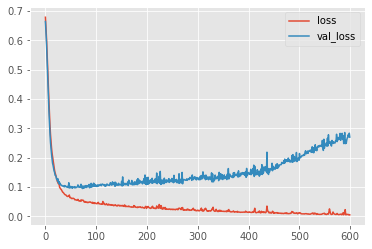

In [40]:
losses[["loss","val_loss"]].plot();

**Suffering extreme overfitting !!!!**

## Dealing with overfitting

### Method1: Early Stopping

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

top training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [47]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6820 - accuracy: 0.4531 - val_loss: 0.6538 - val_accuracy: 0.6154
Epoch 2/600
426/426 [==============================] - 0s 190us/sample - loss: 0.6436 - accuracy: 0.7488 - val_loss: 0.6179 - val_accuracy: 0.8671
Epoch 3/600
426/426 [==============================] - 0s 193us/sample - loss: 0.6056 - accuracy: 0.8427 - val_loss: 0.5784 - val_accuracy: 0.8881
Epoch 4/600
426/426 [==============================] - 0s 184us/sample - loss: 0.5625 - accuracy: 0.8803 - val_loss: 0.5326 - val_accuracy: 0.9021
Epoch 5/600
426/426 [==============================] - 0s 208us/sample - loss: 0.5160 - accuracy: 0.8944 - val_loss: 0.4831 - val_accuracy: 0.9161
Epoch 6/600
426/426 [==============================] - 0s 182us/sample - loss: 0.4700 - accuracy: 0.8826 - val_loss: 0.4341 - val_accuracy: 0.9091
Epoch 7/600
426/426 [==============================] - 0s 181us/sample - l

In [48]:
losses = pd.DataFrame(model.history.history)

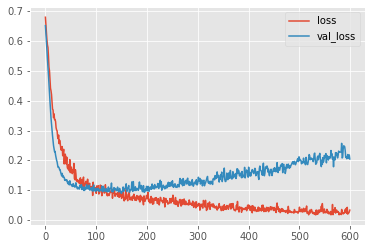

In [58]:
losses[["loss", "val_loss"]].plot();

**Improve!**

### Method2: Adding dropout layers

In [52]:
from tensorflow.keras.layers import Dropout

In [59]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) #50% neurons are randomly turned off

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [60]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7337 - accuracy: 0.5070 - val_loss: 0.6696 - val_accuracy: 0.6643
Epoch 2/600
426/426 [==============================] - 0s 214us/sample - loss: 0.6868 - accuracy: 0.5563 - val_loss: 0.6506 - val_accuracy: 0.8322
Epoch 3/600
426/426 [==============================] - 0s 314us/sample - loss: 0.6834 - accuracy: 0.6080 - val_loss: 0.6324 - val_accuracy: 0.8741
Epoch 4/600
426/426 [==============================] - 0s 384us/sample - loss: 0.6458 - accuracy: 0.7019 - val_loss: 0.6138 - val_accuracy: 0.8811
Epoch 5/600
426/426 [==============================] - 0s 182us/sample - loss: 0.6196 - accuracy: 0.7042 - val_loss: 0.5924 - val_accuracy: 0.9021
Epoch 6/600
426/426 [==============================] - 0s 184us/sample - loss: 0.5787 - accuracy: 0.7582 - val_loss: 0.5637 - val_accuracy: 0.8811
Epoch 7/600
426/426 [==============================] - 0s 238us/sample - l

426/426 [==============================] - 0s 194us/sample - loss: 0.0962 - accuracy: 0.9718 - val_loss: 0.0937 - val_accuracy: 0.9790
Epoch 112/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0977 - accuracy: 0.9648 - val_loss: 0.0974 - val_accuracy: 0.9790
Epoch 113/600
426/426 [==============================] - 0s 195us/sample - loss: 0.1042 - accuracy: 0.9624 - val_loss: 0.1177 - val_accuracy: 0.9650
Epoch 114/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0971 - accuracy: 0.9742 - val_loss: 0.1034 - val_accuracy: 0.9720
Epoch 115/600
426/426 [==============================] - 0s 192us/sample - loss: 0.0951 - accuracy: 0.9671 - val_loss: 0.0949 - val_accuracy: 0.9790
Epoch 00115: early stopping


In [61]:
losses = pd.DataFrame(model.history.history)

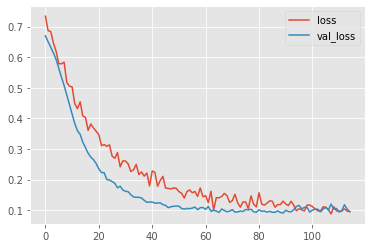

In [62]:
losses[["loss", "val_loss"]].plot();

**Great!**

## Model Evaluation

In [71]:
pred_pro = model.predict(X_test)

In [72]:
pred = model.predict_classes(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(confusion_matrix(y_test, pred.flatten()))

[[53  2]
 [ 1 87]]


In [77]:
print(classification_report(y_test, pred.flatten()))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

